# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
X,y = make_regression(n_samples=1000, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=42)

In [3]:
X.shape, y.shape

((1000, 1), (1000,))

# Train Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1), (200, 1), (800,), (200,))

# Scatter Plot X vs y

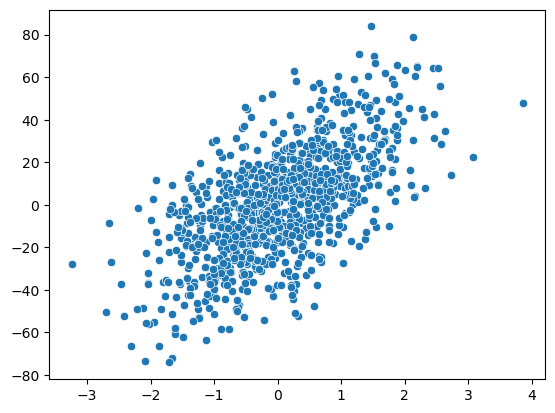

In [6]:
sns.scatterplot(x=X[:, 0], y=y);

# Ridge Regression using sklearn

In [7]:
ridge = Ridge()

## Fit the model

In [8]:
ridge.fit(X_train, y_train)

Ridge()

## Prediction on test data

In [9]:
y_pred_ridge = ridge.predict(X_test)

## R2 Score

In [10]:
print('R2 Score using Sklearn ka Ridge Regression: ', r2_score(y_test, y_pred_ridge))

R2 Score using Sklearn ka Ridge Regression:  0.3757846387516921


## Alpha, Coefficient and Intercept

In [11]:
print(f'Alpha: {ridge.alpha}, Coefficent: {ridge.coef_}, Intercept: {ridge.intercept_}')

Alpha: 1.0, Coefficent: [16.66259857], Intercept: -0.18465331918839567


# Ridge Regression from scratch

In [12]:
class MyRidge():

    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        nr = 0
        dr = 0

        for i in range(X_train.shape[0]):
            nr = nr + ((X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))
            dr = dr + ((X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()))

        self.coef_ = nr / (dr + self.alpha)
        self.intercept_ = y_train.mean() - self.coef_ * X_train.mean()

        print('Coefficient: ', self.coef_)
        print('Intercept: ', self.intercept_)

    def predict(self, X_test):
        return self.coef_ * X_test + self.intercept_

In [13]:
myRidge = MyRidge(alpha=100)

## Fit the model

In [14]:
myRidge.fit(X_train, y_train)

Coefficient:  [14.72271673]
Intercept:  [-0.15418859]


## Prediction on test data

In [15]:
y_pred_my_ridge = myRidge.predict(X_test)

## R2 Score

In [16]:
print('R2 Score using My Ridge Regression: ', r2_score(y_test, y_pred_my_ridge))

R2 Score using My Ridge Regression:  0.37443973852885637


# Visualize the best fit lines

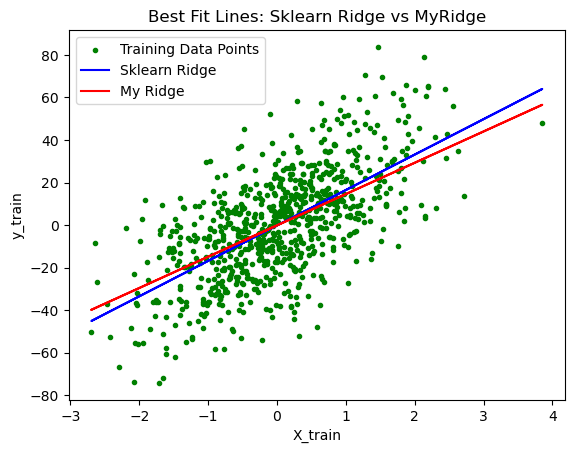

In [17]:
plt.scatter(X_train, y_train, c='green', marker='.', label='Training Data Points')
plt.plot(X_train, ridge.predict(X_train), color='blue', linestyle='-', label='Sklearn Ridge')
plt.plot(X_train, myRidge.predict(X_train), color='red', linestyle='-', label='My Ridge')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Best Fit Lines: Sklearn Ridge vs MyRidge')
plt.legend()
plt.show()